In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.stats.mstats import mquantiles
%matplotlib inline

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<h1> Review of Random Variables and Freqentist Statistics: Probability Density Functions </h1>

<p> In the previous lesson we reviewed the basic definitions in frequentist statistics. In this lesson we want to extend our understanding of histograms to be able to quantify the likeliood of a given observation occuring. For this let us begin by first looking the distribution of fall times shown below, where we consider 100,000 measured drop times. 

<ol>
    <li> What do you notice about the shape of this distribution? Does it look familiar? </li>
    <li> How does the shape compare the distribution shown in the previous lessons and how does the number of samples affect the shape, if at all? </li>
    <li> Comment on the frequency of observations as you move away from the mean. What physical significance of the number of observations toward the edges of the distribution? </li>
<p>

In [3]:
def free_fall_variance(y0, number_measurements, sigma):
    
    g = 9.81
    t_fall = np.sqrt(2*y0/g)
    mu = t_fall
    t_measured = np.random.normal(mu, sigma, number_measurements)
    t_measured = np.round(t_measured, 2)
    
    return t_measured

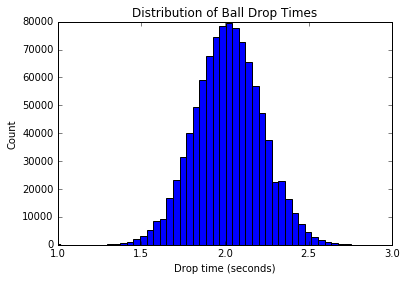

In [4]:
t_measured_fixed = free_fall_variance(20, 1000000, 0.2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(t_measured_fixed, edgecolor = 'black', bins = 50)
ax.set_xlim([1, 3])

ax.set_xlabel('Drop time (seconds)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ball Drop Times')
plt.show()

<p> Recall that we want to relate our the count of our observations to a likelihood of occurence. The first step in quantifying this relation is to normalize the data such that the probability of observing all occurences is 1. The next step is to relate the distribution to an analytic function, known as a probability density function, that can be used to quanitfy the probability of a given observation occuring. This function is shown in red below. </p>

In [5]:
mean_t = np.mean(t_measured_fixed)
std_t = np.std(t_measured_fixed)
x = np.linspace(min(t_measured_fixed), max(t_measured_fixed), 1000)
gauss = mlab.normpdf(x, mean_t, std_t)

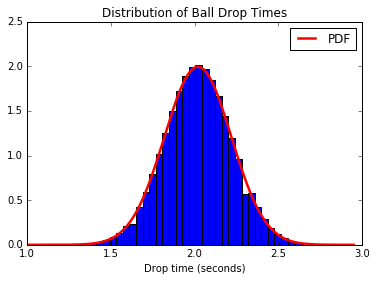

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(t_measured_fixed, edgecolor = 'black',  bins = 50, normed=True)
ax.plot(x, gauss, color = 'red', linewidth = 2.5, label = 'PDF')
ax.legend(loc = 0)
ax.set_xlim([1, 3])

ax.set_xlabel('Drop time (seconds)')
ax.set_title('Distribution of Ball Drop Times')
plt.show()

<h2> Probability Density Functions and The Gaussian Distribution </h2>

In the figure above we see a red curve that outlines the histogram of our drop times. This red curve is known as the probability density function. It is known as a density function because the area under the curve, between two points, represents the probability of those observations occuring. Let us denote a probability denisty function by $\rho(\vec{x})$, where $\vec{x}$ can be any $N$ dimensional observable.

<h3> Properties of PDFs </h3>

 1) The fundamental property of a probability denisty function is that it must normalized such that 

$$\int_{-\infty}^{\infty} \rho(\vec{x}) d\vec{x} = 1$$

 2) It is important to note that if we want to calculate the probability of observing a set of oberservations between two points $a$ and $b$ then we evaluate the integral between those two points:

$$\int_{a}^{b} \rho(\vec{x}) d\vec{x} = P(a \leq \vec{x} \leq b)$$

3) Individual points on a PDF are not meaningful, however, the ratio is. We can interpret the ratio of two points on the PDF as a telling us how likely a is compared to b. We define the likelihood ratio as 

$$\alpha = \frac{\rho(a)}{\rho(b)}$$





<h3> Gaussian Distribution </h3>

<p> One of the most important probability distributions is the Gaussian distribution, which also known as the normal distribution. The gaussian distribution is paremeterized by the mean of the data and variance (the square of the standard deviation) of a set of data. The functional form of a gaussian is given by:

$$\rho(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp({-\frac{(x-<x>)^{2}}{2\sigma^{2}}})$$

Using the widget below, comment on the change in the behavior of the distriubtion as you change the mean and distribution. Comment on what happens to the probabilities as you change the standard deviation.

In [7]:
def f(mean, sigma):

    x = np.arange(-10, 10, 0.001)
    rho = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sigma**2))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, rho, color = 'blue', alpha = 0.6, linewidth = 1, label = 'PDF')
    ax.legend(loc = 0)
    ax.set_ylim([0, 1])

    ax.set_xlabel('x')
    ax.set_ylabel('PDF')
    ax.set_title('Distribution of Ball Drop Times')
    plt.show()
    
interact(f, mean = (-5, 5), sigma = (0.01, 5))
plt.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [8]:
t_mean = np.mean(t_measured_fixed)
t_std = np.std(t_measured_fixed)
t_median = np.median(t_measured_fixed)
quants = mquantiles(t_measured_fixed)



<h2> Quantiles </h2>

Now that we have discussed the properties of probability, we want to begin our discussion of likelihood. Before moving on to a formal study of likelihood, we should define one more way to characterize groups within our data set. We do this by separating the distribution into bins or percentiles. Two useful ways to bin the distribution are using quantiles which separate the data into percentages such that we know the percentage of data that fall below a given value. For example, the 1-quantile (the median) separates the distribution into two bins such that 50% of the values are below the 1-quantile and 50% of the data are above the 1-quantile. The 4-quantiles, also known as quartiles, separate the data into bins of 25% 50% and 75%, and the 5-quantiles separate the data into bins of 20%, 40%, 60%, and 80%. We are interested in separating the data into these quantiles as it will allow us to describe confidence intervals.

<h3> Drop time Quantiles </h3>

The table below shows the descriptive statistics of our drop times. 

<table style="width:50%">
  <tr>
    <th>Mean</th>
    <th>Median</th> 
    <th>Standard Deviation</th>
  </tr>
  <tr>
    <td>2.02 seconds</td>
    <td>2.02 seconds</td> 
    <td>0.2 seconds</td>
  </tr>
</table>

<table style="width:50%">
  <tr>
    <th>25th percentile </th>
    <th>50th percentile</th> 
    <th>75th percentile</th>
  </tr>
  <tr>
    <td>1.88 seconds</td>
    <td>2.02 seconds</td> 
    <td>2.15 seconds</td>
  </tr>
</table>

<p>
In this case we can interpret the percentiles as follows: 25 percent of the data have a drop time below 1.88 seconds, 50 percent of the data have a drop time below 2.02 seconds, and 75 percent of the data have a fall time below 2.15 seconds.</p>

<h3> Quantile-Quantile Plot: Testing Gaussian Statistics </h3>

<p>
One of the major questions we want to answer is whether a given data set displays Gaussian behavior. This is an important question to answer as many hypothesis tests and outlier tests depend on the assumpition that the data is normally distributed. One way to test whether a data set is Gaussian is to plot the data quantiles vs the expected quantile values of a Gaussian parameterized by the mean and standard deviation. If this is a 1:1 line then we can say that the data is normally distributed. Shown is a quantile-quantile plot of our drop time data. We observe that it follows a 1:1 line (shown in red) thus we can assume that our drop data is normally distributed. </p>







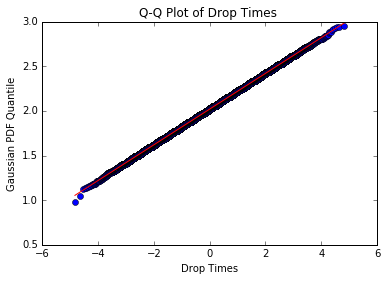

In [9]:
fig = plt.figure()

ax = fig.add_subplot(111) # row 0, col 0
res = stats.probplot(t_measured_fixed, plot=plt)
ax.set_xlabel('Drop Times')
ax.set_ylabel('Gaussian PDF Quantile')
ax.set_title('Q-Q Plot of Drop Times ')
plt.show()

<h2> Confidence Intervals and Standard Deviation </h2>

<p>
One important exetension of the quantile is to construct a confidence interval of ones measurement. Data is inheritently uncertain, as reflected in our distribution of drop times, and thus a measurement has a given uncertainty associated with it. More importantly, and scientifically, the uncertainty is also a statement about the reproducibility of that data. We can also think of the stated uncertainty as a statement of confidence that if someone were to re-collect the same data, what is the likelihood they will observe the same values or what is the probability they would observe values within a range given by the uncertainty. We can construct these confidence intervals based on the standard deviation of the data. We measure the uncertainty based on the deviation from the mean value, which is why we use the standard deviation. In the case of Guassian statistics the probability that a given data point is within 68% percent of the mean value is associated with one standard deviation away from the mean and the probability that 95% of the data fall within the mean value is given by two standard devaitions away from the mean. </p>


